# Data Cleaning

In [1]:
import pandas as pd
data = pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
data.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [4]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.isna().any().sum()

0

# Data selection Using Filter Method

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('IRIS.csv')

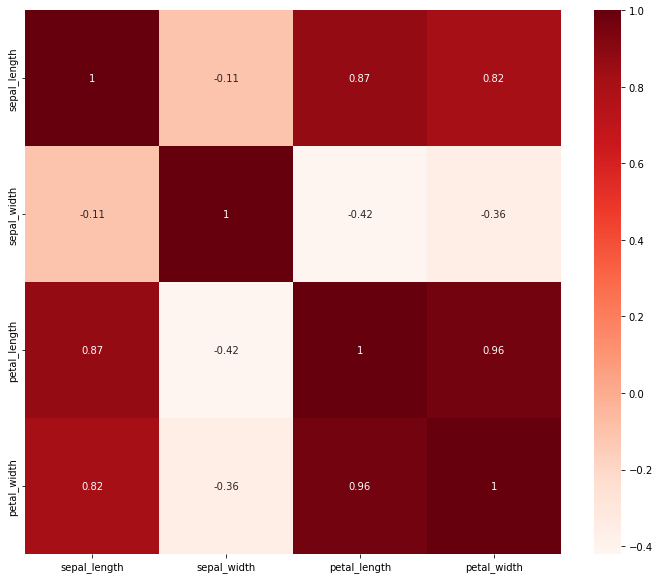

In [8]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
cor_target = abs(cor["sepal_length"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

sepal_length    1.000000
petal_length    0.871754
petal_width     0.817954
Name: sepal_length, dtype: float64

# Model Building with Elbow Method

In [10]:
import pandas
from sklearn.cluster import KMeans

In [11]:
data = pandas.read_csv('IRIS.csv')

In [12]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [13]:
# finding optimal number of clusters
css = []
for i in range(1, 11) :
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    css.append(kmeans.inertia_)

Text(0.5, 0, 'Number of Clusters')

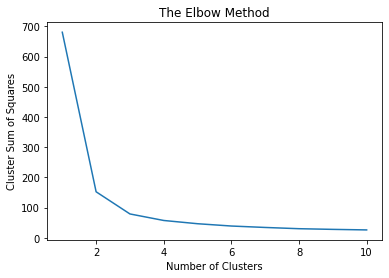

In [14]:
# plot result onto a line graph
plt.plot(range(1, 11), css)
plt.title("The Elbow Method")
plt.ylabel("Cluster Sum of Squares")
plt.xlabel("Number of Clusters")

In [15]:
# apply k-meanse to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = kmeans.fit_predict(x)

# Model Evaluation

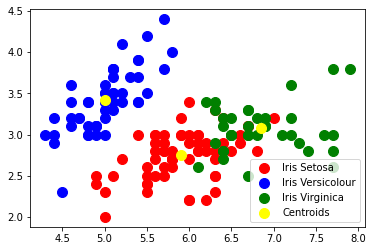

In [16]:
# cluster visualization
plt.scatter(x[y==0, 0], x[y==0, 1], s=100, c='red', label='Iris Setosa')
plt.scatter(x[y==1, 0], x[y==1, 1], s=100, c='blue', label='Iris Versicolour')
plt.scatter(x[y==2, 0], x[y==2, 1], s=100, c='green', label='Iris Virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()